In [5]:
import pandas as pd

In [10]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings

In [11]:

warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [12]:
access_token = "2332145246-UbfCEpn4qlEJXoh04hKcquI1B1ibFDiIMyrbHD9"
access_token_secret = "35kVzqZE6Cg7vCGs7th5LN6gn3GHxlecd935BpyjMKZOp"
consumer_key = "vVG4Tru4ZL8ZZocm3OjQNsxt0"
consumer_secret = "5hclYhkUeHVNmRMG1qJpshDSs05ONWnG3I18IZ0kFQuF3XPP53"

In [13]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Post a tweet from Python
## api.update_status("Look, I'm tweeting from #Python in my #earthanalytics class! @code")
# Your tweet has been posted!

In [48]:
search_term = ["#sustainability", "sustainable"]

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-11-26').items(200)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]


[]

In [15]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [16]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Ingmar Hgy CEO and Chairman of the Board at Greentech Innovators AS spoke to The Innovation Platform about the',
 'Pleased to have more students applying to be in our Eco Group We only started it last academic year but it is grow',
 'Building climateresilient infrastructure in the postpandemic world netzero sustainability green environment',
 'Building climateresilient infrastructure in the postpandemic world netzero sustainability green environment',
 'RT francoisz Im super excited to share the preview of Argos a tool my company built to measure the carbon footprint of software and to']

In [18]:
all_tweets_no_urls[1].lower().split()

['pleased',
 'to',
 'have',
 'more',
 'students',
 'applying',
 'to',
 'be',
 'in',
 'our',
 'eco',
 'group',
 'we',
 'only',
 'started',
 'it',
 'last',
 'academic',
 'year',
 'but',
 'it',
 'is',
 'grow']

In [19]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['ingmar',
  'hgy',
  'ceo',
  'and',
  'chairman',
  'of',
  'the',
  'board',
  'at',
  'greentech',
  'innovators',
  'as',
  'spoke',
  'to',
  'the',
  'innovation',
  'platform',
  'about',
  'the'],
 ['pleased',
  'to',
  'have',
  'more',
  'students',
  'applying',
  'to',
  'be',
  'in',
  'our',
  'eco',
  'group',
  'we',
  'only',
  'started',
  'it',
  'last',
  'academic',
  'year',
  'but',
  'it',
  'is',
  'grow']]

In [20]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 156),
 ('to', 146),
 ('rt', 99),
 ('sustainable', 89),
 ('of', 85),
 ('a', 74),
 ('and', 62),
 ('in', 49),
 ('for', 45),
 ('sustainability', 34),
 ('our', 33),
 ('we', 31),
 ('is', 31),
 ('excited', 25),
 ('new', 21)]

In [21]:
# Pandas Data Framing
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,156
1,to,146
2,rt,99
3,sustainable,89
4,of,85


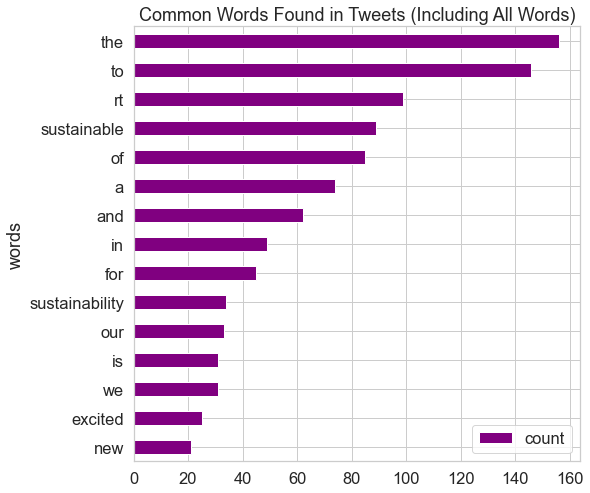

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yhows_000\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['mustn',
 'where',
 'am',
 'ours',
 'above',
 'yourself',
 'her',
 'with',
 'from',
 "shan't"]

In [ ]:
# Compare before / after removing stop words

In [27]:
words_in_tweet[0]

['ingmar',
 'hgy',
 'ceo',
 'and',
 'chairman',
 'of',
 'the',
 'board',
 'at',
 'greentech',
 'innovators',
 'as',
 'spoke',
 'to',
 'the',
 'innovation',
 'platform',
 'about',
 'the']

In [26]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['ingmar',
 'hgy',
 'ceo',
 'chairman',
 'board',
 'greentech',
 'innovators',
 'spoke',
 'innovation',
 'platform']

In [30]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('rt', 99),
 ('sustainable', 89),
 ('sustainability', 34),
 ('excited', 25),
 ('new', 21),
 ('built', 20),
 ('carbon', 20),
 ('im', 18),
 ('share', 18),
 ('measure', 18),
 ('company', 17),
 ('future', 17),
 ('super', 16),
 ('preview', 16),
 ('argos', 16)]

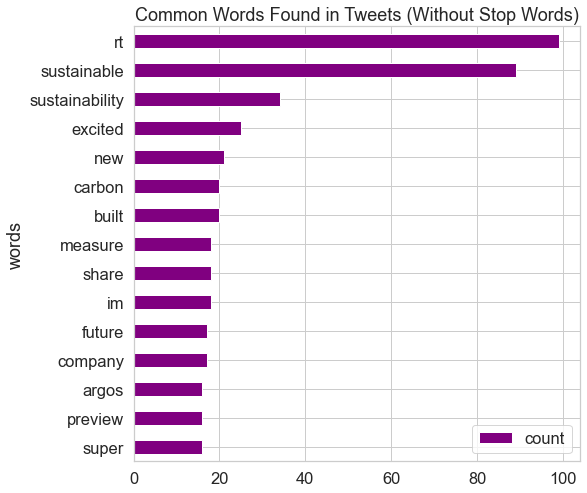

In [31]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

# Exclude below words

In [38]:
collection_words = ['rt','sustainable' , 'sustainability', 'im']

In [39]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [40]:
tweets_nsw[0]

['ingmar',
 'hgy',
 'ceo',
 'chairman',
 'board',
 'greentech',
 'innovators',
 'spoke',
 'innovation',
 'platform']

# all cleaned now

In [41]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('excited', 25),
 ('new', 21),
 ('built', 20),
 ('carbon', 20),
 ('share', 18),
 ('measure', 18),
 ('company', 17),
 ('future', 17),
 ('super', 16),
 ('preview', 16),
 ('argos', 16),
 ('tool', 16),
 ('footprint', 16),
 ('lucsuslu', 16),
 ('francoisz', 15)]

In [42]:
len(counts_nsw_nc)

967

In [43]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,excited,25
1,new,21
2,built,20
3,carbon,20
4,share,18


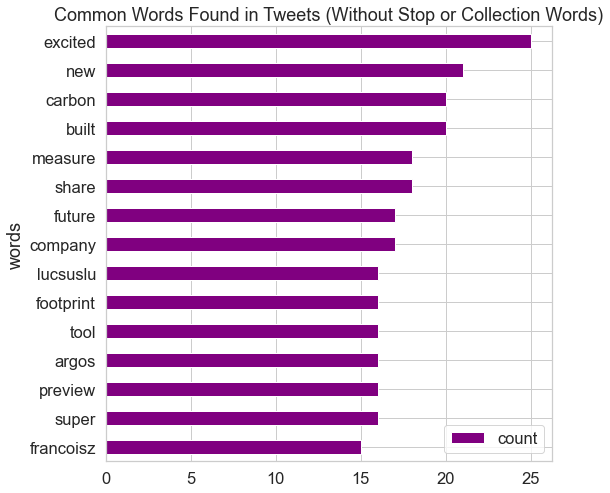

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

# When,who, where are the tweets?

In [58]:
tweet_detail = [[tweet.created_at, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_detail[:5]

[[datetime.datetime(2020, 11, 26, 17, 14, 38),
  'jane__eden',
  'Kampala, Uganda'],
 [datetime.datetime(2020, 11, 26, 17, 12, 31), 'vmbusiness', 'UK'],
 [datetime.datetime(2020, 11, 26, 17, 11, 2), 'GreenBuildingWI', ''],
 [datetime.datetime(2020, 11, 26, 17, 10, 43),
  'sustainableuni1',
  'London, England'],
 [datetime.datetime(2020, 11, 26, 17, 10, 16), 'magnifintech', 'Global']]

In [ ]:
list(itertools.chain(*words_in_tweet))